In [36]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from env import host, user, password

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

- What is the probability that no cars drive up in the noon hour?
- What is the probability that 3 or more cars come through the drive through?

- How likely is it that the drive through gets at least 1 car?

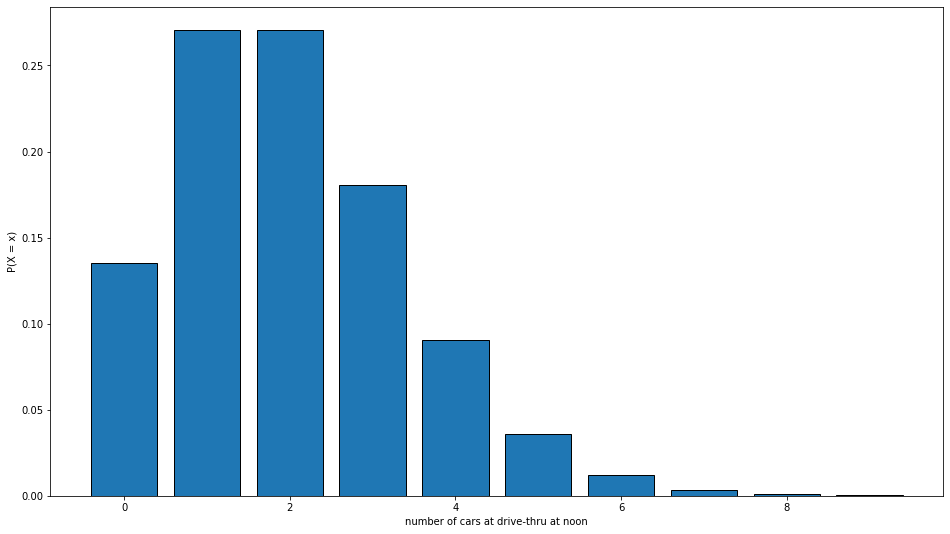

In [8]:
#.pmf works with a single number or a sequence of numbers

plt.figure(figsize=(16, 9))
x = np.arange(0, 10)
y = stats.poisson(2).pmf(x)

plt.bar(x, y, ec='black')
plt.ylabel('P(X = x)')
plt.xlabel('number of cars at drive-thru at noon')
plt.show()

### What is the probability that no cars drive up in the noon hour?

In [11]:
stats.poisson(2).pmf(0)

0.1353352832366127

In [10]:
# Experimental

cars = np.random.poisson(2, 10_000)
(cars == 0).mean()

0.1346

In [64]:
# Ryan's Version

per_hour = 2

theory = stats.poisson(per_hour).pmf(0)
simulated = (stats.poisson(per_hour).rvs(10_000) == 0).mean()

theory, simulated

(0.1353352832366127, 0.1325)

### What is the probability that 3 or more cars come through the drive through?

In [11]:
stats.poisson(2).sf(2)

0.32332358381693654

In [13]:
# Experimental

cars = np.random.poisson(2, 10_000)
(cars >= 3).mean()

0.32

In [65]:
# Ryan's Version
# We need to use discrete numbers, # or more means if this then that, so survival function

theory = stats.poisson(per_hour).sf(2)
simulated = (stats.poisson(per_hour).rvs(10_000) >= 3).mean()

theory, simulated

(0.32332358381693654, 0.3179)

### How likely is it that the drive through gets at least 1 car?

In [16]:
stats.poisson(2).sf(0)

0.8646647167633873

In [17]:
# Experimental

cars = np.random.poisson(2, 10_000)
(cars > 0).mean()

0.8689

In [66]:
# Ryan's Version


theory = stats.poisson(per_hour).sf(0)
simulated = (stats.poisson(per_hour).rvs(10_000) >= 1).mean()

theory, simulated

(0.8646647167633873, 0.8636)

### Exercise 2

Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?

### What grade point average is required to be in the top 5% of the graduating class?

In [71]:
µ = 3.0
σ = .3

stats.norm(μ, σ).isf(.05)

3.4934560880854417

In [72]:
# Experimental

graduates = np.random.normal(μ, σ, 10_000)
np.quantile(graduates, .95)

3.498203583133758

In [77]:
mean = 3.0
std = 0.3
# What grade point average is required to be in the top 5% of the graduating class?
# "greater than" means it's survival function or inverse survival function
# Because we have percentage and want the value, we use .isf
grade_distribution = stats.norm(mean, std)
theory = grade_distribution.isf(.05)
simulated = np.percentile(grade_distribution.rvs(10_000), 95)

theory, simulated

(3.4934560880854417, 3.4962688361947376)

### What GPA constitutes the bottom 15% of the class?

In [24]:
stats.norm(μ, σ).isf(.85)

2.689069983151863

In [25]:
# Experimental

graduates = np.random.normal(μ, σ, 10_000)
np.quantile(graduates, .15)

2.68998465127084

In [78]:
# What GPA constitutes the bottom 15% of the class?
# What we have is the percentage
# What we want is the grade
# And we want to know 15% or lower
# That's .ppf

theory = grade_distribution.ppf(.15)
simulated = np.percentile(grade_distribution.rvs(10_000), 15)
theory, simulated

(2.689069983151863, 2.6922390492597446)

### An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [31]:
upper = stats.norm(μ, σ).ppf(.3)
lower = stats.norm(μ, σ).ppf(.2)
print(f"The third to last decile is between {lower} and {upper}. So a student with a 2.8 GPA would qualify.")

The third to last decile is between 2.7475136299281258 and 2.842679846187588. So a student with a 2.8 GPA would qualify.


In [35]:
# Experimental

upper_e = np.quantile(graduates, .3)
lower_e = np.quantile(graduates, .2)

print(f"The third to last decile is between {lower_e} and {upper_e}. So a student with a 2.8 GPA would qualify.")

The third to last decile is between 2.751219555539204 and 2.8469669066358962. So a student with a 2.8 GPA would qualify.


In [79]:
# An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. 
# Determine the range of the third decile. 
# Third decile means 30% and lower b/c deciles are 10% intervals
# Would a student with a 2.8 grade point average qualify for this scholarship?
# "Less than" a threshold is .cdf or .ppf
# And we use .ppf here because we have the percentage and want the cutoff number
gpa = 2.8
theory = gpa > grade_distribution.ppf(.2) and gpa < grade_distribution.ppf(.3)
print("2nd decile is", grade_distribution.ppf(.2))
print("3rd decile is", grade_distribution.ppf(.3))

theory

2nd decile is 2.7475136299281258
3rd decile is 2.842679846187588


True

### If I have a GPA of 3.5, what percentile am I in?

In [83]:
stats.norm(μ, σ).sf(3.5)

0.0477903522728147

In [85]:
graduates = np.random.normal(μ, σ, 10_000)
np.quantile(graduates, .15)

2.682517506807059

In [80]:
upper_bound = np.percentile(grade_distribution.rvs(10_000), 30)
lower_bound = np.percentile(grade_distribution.rvs(10_000), 20)
print("Lower bound is", lower_bound)
print("Upper bound is", upper_bound)
simulated = lower_bound < gpa and gpa < upper_bound
simulated

Lower bound is 2.7516462355283986
Upper bound is 2.842937468922851


True

In [81]:
# If I have a GPA of 3.5, what percentile am I in?
# Percentile means at or below a level, so we use .cdf
theory = grade_distribution.cdf(3.5)
simulated = (grade_distribution.rvs(10_000) <= 3.5).mean()
theory, simulated

(0.9522096477271853, 0.9528)

### Exercise 3

### A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [49]:
# This many or more, this is a survival function
ctr = .02
visitors = 4326
click_throughs = 97

stats.binom(visitors, ctr).sf(click_throughs - 1)

0.1397582363130086

In [54]:
# Experimental

marketing_trials = np.random.binomial(visitors, ctr, 10_000)
(marketing_trials >= click_throughs).mean()

0.1383

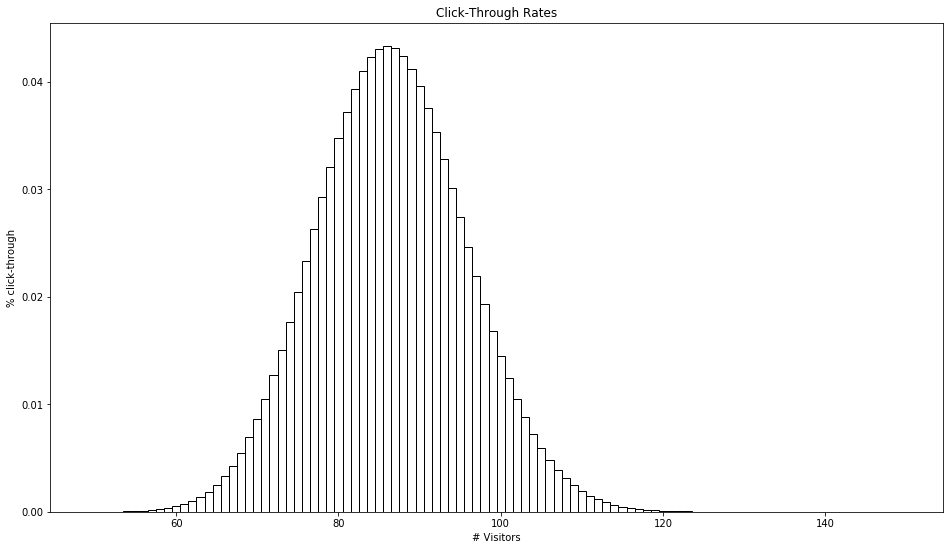

In [88]:
plt.figure(figsize=(16, 9))
x = np.arange(50, 150)
y = stats.binom(4326, .02).pmf(x)

plt.title("Click-Through Rates")
plt.xlabel("# Visitors")
plt.ylabel("% click-through")
plt.bar(x, y, color="white", edgecolor="black", width=1)
plt.show()

### Exercise 4

### You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

### What is the probability that at least one of your first 60 answers is correct?

In [89]:
#Binomal becuase we are correct or ewe are not, 1 or 0

answers = 60
possible_right = .01

# More that or great makes this a servival function

stats.binom(answers, possible_right).sf(0)

0.4528433576092388

In [90]:
# Experimental

simulation = np.random.binomial(answers, possible_right, 10_000)
(simulation > 0).mean()

0.4536

### Exercise 5

The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. All week?

### How likely is it that the break area gets cleaned up each day?

In [6]:
cohorts = 3
students_per = 22
percent_visits = .9

visits = round(cohorts * students_per * percent_visits, 0)
visits

59.0

In [92]:
chance_clean = .03 # chance that any one student cleans during a visit

theory = stats.binom(visits, chance_clean).sf(0)
theory

0.8342199288437355

In [12]:
# Experimental

ex_chance_clean = np.random.binomial(visits, chance_clean, 10_000)
(ex_chance_clean > 0).mean()

0.8238

### How likely is it that it goes two days without getting cleaned up? 

In [93]:
n_days = 2

(1 - theory) ** n_days, (1 - ex_chance_clean) ** n_days 

(0.027483031992576113, array([1, 4, 1, ..., 4, 0, 0]))

In [96]:
# How likely is it that the break area gets cleaned up each day?
n_students = round(.9 * 3 * 22)

# "Greater than" is our signal to use .sf or .isf
# Greater than 0 means someone cleaned up 
theory = stats.binom(n_students, .03).sf(0)

simulation = (stats.binom(n_students, .03).rvs(100_000) > 0).mean()
theory, simulation


(0.8342199288437355, 0.83501)

In [97]:
n_days = 2
(1 - theory) ** n_days, (1 - simulation) ** n_days

(0.027483031992576113, 0.02722170009999999)

In [98]:
stats.binom(2, 1 - theory).sf(1)

0.027483031992576113

In [99]:
# How likely is it that it goes 5 days without getting cleaned up?
# p_not_clean = 1 - p_clean
n_days = 5
(1 - theory) ** n_days, (1 - simulation) ** n_days

(0.0001252165138809122, 0.00012226104758560264)

### Exercise 6

You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3.

In [19]:
#expected(μ) and standard dev(σ) of number of people in line
μ = 15
σ = 3

If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [20]:
#Is there an ideal wait time? This will be in minutes
lunch_time = 60
eating_time = 15
food_prep = 10
order_time = 2
wait_time = lunch_time - food_prep - eating_time - order_time
wait_time

33

In [26]:
#What is the expected line wait time?
μ_line_wait = μ * 2
σ_line_wait = σ * 2

In [28]:
stats.norm(μ_line_wait, σ_line_wait).cdf(wait_time)

0.6914624612740131

In [30]:
#Experimental

will_i_get_lunch_at_pandera = np.random.normal(μ_line_wait, σ_line_wait, 10_000)
(will_i_get_lunch_at_pandera <= wait_time).mean()

0.6939

### Exercise 7

Connect to the employees database and find the average salary of current employees, along with the standard deviation. Model the distribution of employees salaries with a normal distribution and answer the following questions:

What percent of employees earn less than 60,000?
What percent of employees earn more than 95,000?
What percent of employees earn between 65,000 and 80,000?
What do the top 5% of employees make?

In [32]:
def get_db_url(username, hostname, password, db_name):
    return f'mysql+pymysql://{username}:{password}@{hostname}/{db_name}'

In [33]:
query = '''
    SELECT * 
    FROM salaries
    WHERE to_date like '9999%%';
'''

In [34]:
url = get_db_url(user,host,password,'employees')

In [37]:
salaries = pd.read_sql(query,url)

/usr/local/anaconda3/lib/python3.7/site-packages/pymysql/cursors.py:170: Warning: (1292, "Incorrect date value: '9999%' for column 'to_date' at row 1")
  result = self._query(query)


In [38]:
salaries.head(10)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
5,10006,59755,2001-08-02,9999-01-01
6,10007,88070,2002-02-07,9999-01-01
7,10009,94409,2002-02-14,9999-01-01
8,10010,80324,2001-11-23,9999-01-01
9,10012,54423,2001-12-16,9999-01-01


In [40]:
mean = salaries['salary'].mean()
mean

72012.23585730705

In [44]:
stdv = salaries['salary'].std()
stdv

17309.99538025198

In [47]:
salary_dist = stats.norm(mean, stdv)

In [49]:
under_60k = salary_dist.cdf(60_000)
under_60k

0.24385742480214423

In [51]:
over_95k = salary_dist.sf(95_000)
over_95k

0.09208819199804053

In [52]:
between_65k_and_80k = salary_dist.cdf(80_000) - salary_dist.cdf(65_000)
between_65k_and_80k

0.3350605685446666

In [55]:
top_5_percent = salary_dist.isf(.05)
top_5_percent

100484.64454102777